<a href="https://colab.research.google.com/github/ericrizzatti/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df_completo = pd.read_csv('/content/dados_tratados.csv')
df_completo.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.6,593.30,2.197407
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.9,542.40,2.008889
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.340417
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85,3.173974
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.9,267.40,2.971111


In [6]:
dados = df_completo.drop(['customerID','PaperlessBilling','Charges.Total','Contas_Diarias'], axis=1)

In [7]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly
0,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Cheque por correio,65.6
1,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a mês,Cheque por correio,59.9
2,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a mês,Cheque eletrônico,73.9
3,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a mês,Cheque eletrônico,98.0
4,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a mês,Cheque por correio,83.9


In [8]:
colunas = dados.columns
colunas

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'Charges.Monthly'],
      dtype='object')

In [9]:
for i in colunas:
  print(f'valores unicos de {i} : {dados[i].unique()}')

valores unicos de Churn : ['Não' 'Sim']
valores unicos de gender : ['Feminino' 'Masculino']
valores unicos de SeniorCitizen : [0 1]
valores unicos de Partner : ['Sim' 'Não']
valores unicos de Dependents : ['Sim' 'Não']
valores unicos de tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
valores unicos de PhoneService : ['Sim' 'Não']
valores unicos de MultipleLines : ['Não' 'Sim' 'Sem serviço telefônico']
valores unicos de InternetService : ['DSL' 'Fibra ótica' 'Não']
valores unicos de OnlineSecurity : ['Não' 'Sim' 'Sem serviço de internet']
valores unicos de OnlineBackup : ['Sim' 'Não' 'Sem serviço de internet']
valores unicos de DeviceProtection : ['Não' 'Sim' 'Sem serviço de internet']
valores unicos de TechSupport : ['Sim' 'Não' 'Sem serviço de internet']
valores unicos de StreamingTV : ['Sim' 'Não' 'Sem

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
colunas_categoricas = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_hot = one_hot_enc.fit_transform(dados)
dados_hot = pd.DataFrame(dados_hot , columns=one_hot_enc.get_feature_names_out())
dados_hot

,onehotencoder__MultipleLines_Não,onehotencoder__MultipleLines_Sem serviço telefônico,onehotencoder__MultipleLines_Sim,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fibra ótica,onehotencoder__InternetService_Não,onehotencoder__OnlineSecurity_Não,onehotencoder__OnlineSecurity_Sem serviço de internet,onehotencoder__OnlineSecurity_Sim,onehotencoder__OnlineBackup_Não,...,onehotencoder__PaymentMethod_Cheque por correio,onehotencoder__PaymentMethod_Transferência bancária (automática),remainder__Churn,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__Charges.Monthly
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Não,Feminino,0,Sim,Sim,9,Sim,65.6
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Não,Masculino,0,Não,Não,9,Sim,59.9
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,Sim,Masculino,0,Não,Não,4,Sim,73.9
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,Sim,Masculino,1,Sim,Não,13,Sim,98.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Sim,Feminino,1,Sim,Não,3,Sim,83.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Não,Feminino,0,Não,Não,13,Sim,55.15
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,Sim,Masculino,0,Sim,Não,22,Sim,85.1
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Não,Masculino,0,Não,Não,2,Sim,50.3
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Não,Masculino,0,Sim,Sim,67,Sim,67.85


In [11]:
print(dados_hot['remainder__Churn'].value_counts(normalize = True))

remainder__Churn
Não    0.73463
Sim    0.26537
Name: proportion, dtype: float64


In [12]:

from sklearn.preprocessing import LabelEncoder
arrumar = ['remainder__Churn', 'remainder__gender', 'remainder__Partner','remainder__Dependents','remainder__PhoneService']
le = LabelEncoder()

for coluna in arrumar:
    dados_hot[coluna] = le.fit_transform(dados_hot[coluna])

In [13]:
for col in dados_hot.select_dtypes(include=['object', 'category']).columns:
    try:
        dados_hot[col] = pd.to_numeric(dados_hot[col], errors='coerce')  # converte para float, se possível
        print(f"✅ Coluna '{col}' convertida com sucesso.")
    except:
        print(f"⚠️ Não foi possível converter a coluna: {col}")

✅ Coluna 'onehotencoder__MultipleLines_Não' convertida com sucesso.
✅ Coluna 'onehotencoder__MultipleLines_Sem serviço telefônico' convertida com sucesso.
✅ Coluna 'onehotencoder__MultipleLines_Sim' convertida com sucesso.
✅ Coluna 'onehotencoder__InternetService_DSL' convertida com sucesso.
✅ Coluna 'onehotencoder__InternetService_Fibra ótica' convertida com sucesso.
✅ Coluna 'onehotencoder__InternetService_Não' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineSecurity_Não' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineSecurity_Sem serviço de internet' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineSecurity_Sim' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineBackup_Não' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineBackup_Sem serviço de internet' convertida com sucesso.
✅ Coluna 'onehotencoder__OnlineBackup_Sim' convertida com sucesso.
✅ Coluna 'onehotencoder__DeviceProtection_Não' convertida com sucesso.
✅ Coluna 'onehotencoder__DeviceProtectio

In [14]:
dados_hot

,onehotencoder__MultipleLines_Não,onehotencoder__MultipleLines_Sem serviço telefônico,onehotencoder__MultipleLines_Sim,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fibra ótica,onehotencoder__InternetService_Não,onehotencoder__OnlineSecurity_Não,onehotencoder__OnlineSecurity_Sem serviço de internet,onehotencoder__OnlineSecurity_Sim,onehotencoder__OnlineBackup_Não,...,onehotencoder__PaymentMethod_Cheque por correio,onehotencoder__PaymentMethod_Transferência bancária (automática),remainder__Churn,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__Charges.Monthly
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,1,9,1,65.60
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0,1,0,0,0,9,1,59.90
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1,1,0,0,0,4,1,73.90
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,1,0,13,1,98.00
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1,0,1,1,0,3,1,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0,0,0,0,0,13,1,55.15
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1,1,0,1,0,22,1,85.10
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,1,0,0,0,2,1,50.30
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0,1,0,1,1,67,1,67.85


In [15]:
matriz_corr = dados_hot.corr()

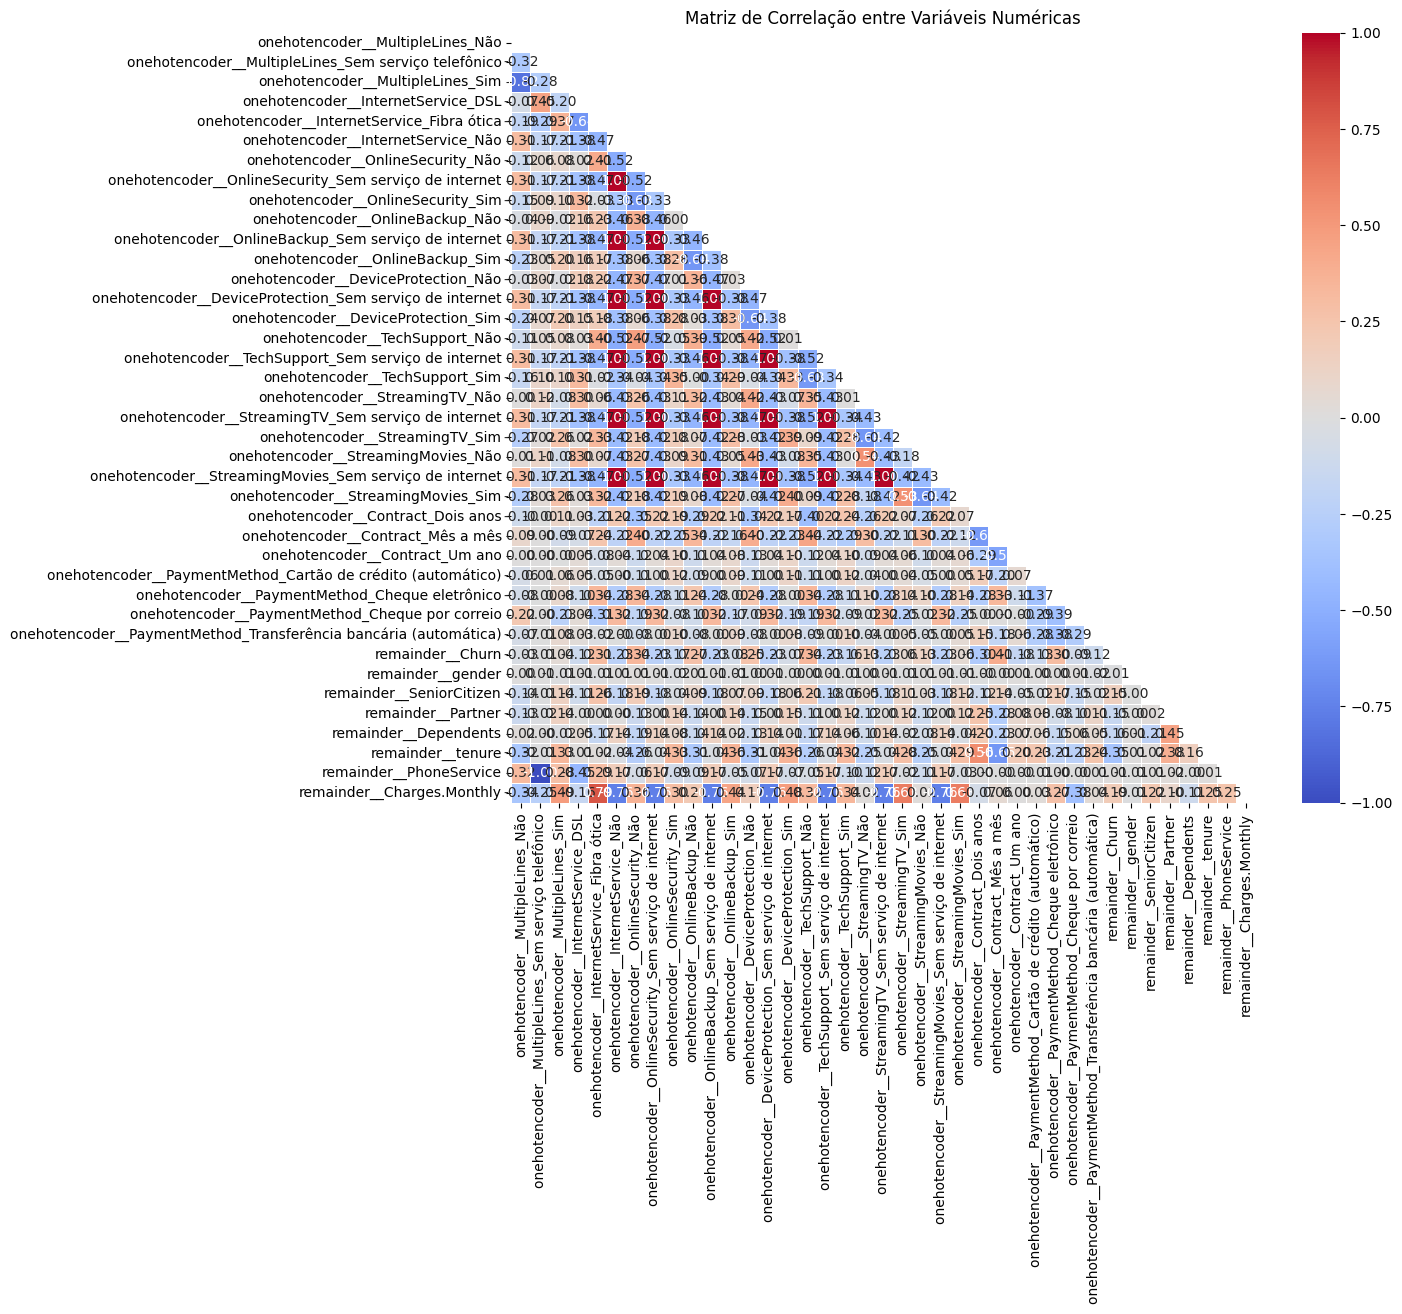

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            mask=np.triu(matriz_corr))  # opcional: esconde metade da matriz
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [17]:
correlacoes_churn = matriz_corr['remainder__Churn'].sort_values(ascending=False)
print(correlacoes_churn)

remainder__Churn                                                    1.000000
onehotencoder__Contract_Mês a mês                                   0.405103
onehotencoder__OnlineSecurity_Não                                   0.342637
onehotencoder__TechSupport_Não                                      0.337281
onehotencoder__InternetService_Fibra ótica                          0.308020
onehotencoder__PaymentMethod_Cheque eletrônico                      0.301919
onehotencoder__OnlineBackup_Não                                     0.268005
onehotencoder__DeviceProtection_Não                                 0.252481
remainder__Charges.Monthly                                          0.193356
remainder__SeniorCitizen                                            0.150889
onehotencoder__StreamingMovies_Não                                  0.130845
onehotencoder__StreamingTV_Não                                      0.128916
onehotencoder__StreamingTV_Sim                                      0.063228

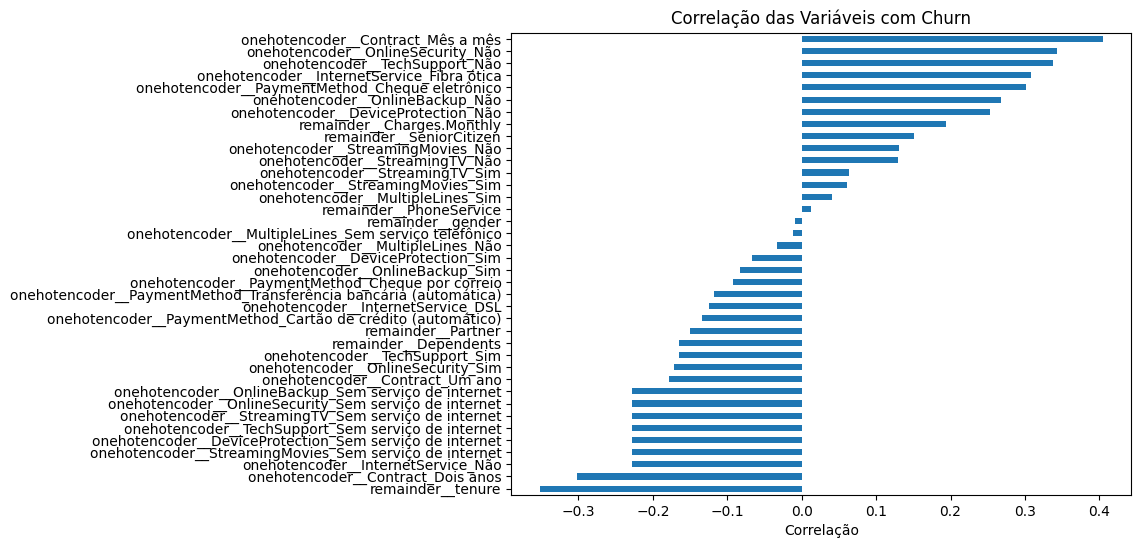

In [18]:
correlacoes_churn.drop('remainder__Churn').sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Correlação das Variáveis com Churn')
plt.xlabel('Correlação')
plt.show()

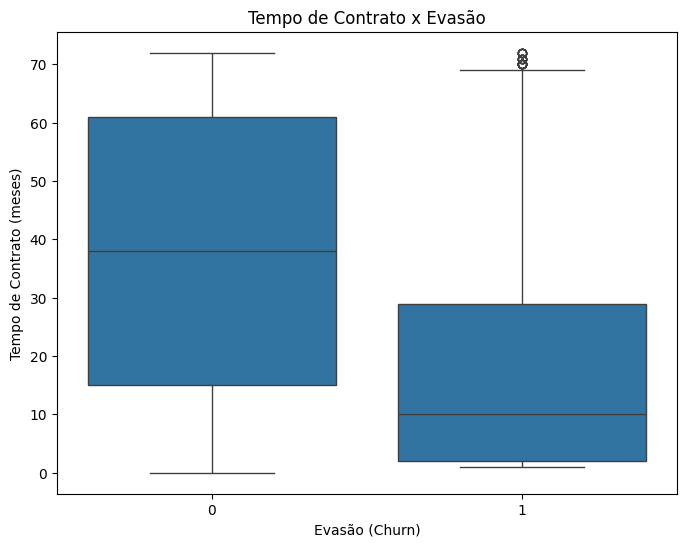

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='remainder__Churn', y='remainder__tenure', data=dados_hot)
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

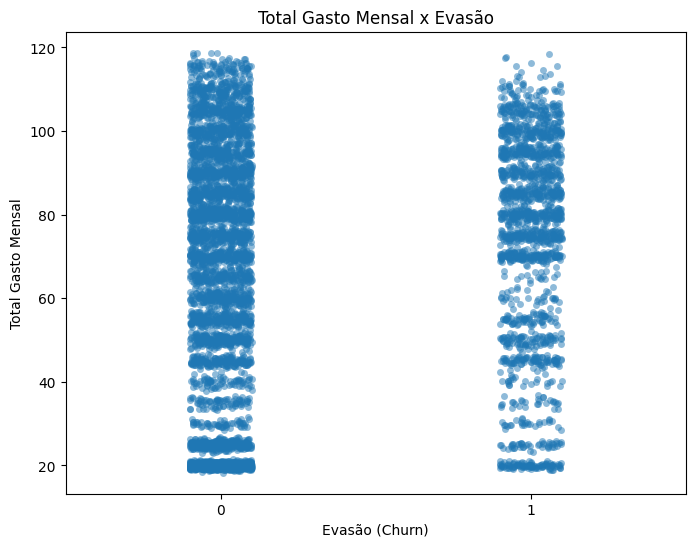

In [20]:
plt.figure(figsize=(8,6))
sns.stripplot(x='remainder__Churn', y='remainder__Charges.Monthly', data=dados_hot, jitter=True, alpha=0.5)
plt.title('Total Gasto Mensal x Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Total Gasto Mensal')
plt.show()

In [21]:
teste = (dados_hot.corr()['remainder__Churn'] <= -0.19) | (dados_hot.corr()['remainder__Churn'] >= 0.19)

In [22]:
teste.value_counts()

,count
remainder__Churn,
False,21
True,18


In [23]:
dados_hot_filtrado = dados_hot.loc[:,teste]
dados_hot_filtrado

,onehotencoder__InternetService_Fibra ótica,onehotencoder__InternetService_Não,onehotencoder__OnlineSecurity_Não,onehotencoder__OnlineSecurity_Sem serviço de internet,onehotencoder__OnlineBackup_Não,onehotencoder__OnlineBackup_Sem serviço de internet,onehotencoder__DeviceProtection_Não,onehotencoder__DeviceProtection_Sem serviço de internet,onehotencoder__TechSupport_Não,onehotencoder__TechSupport_Sem serviço de internet,onehotencoder__StreamingTV_Sem serviço de internet,onehotencoder__StreamingMovies_Sem serviço de internet,onehotencoder__Contract_Dois anos,onehotencoder__Contract_Mês a mês,onehotencoder__PaymentMethod_Cheque eletrônico,remainder__Churn,remainder__tenure,remainder__Charges.Monthly
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9,65.60
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,9,59.90
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,4,73.90
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,13,98.00
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13,55.15
7039,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,22,85.10
7040,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2,50.30
7041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,67,67.85


<Axes: >

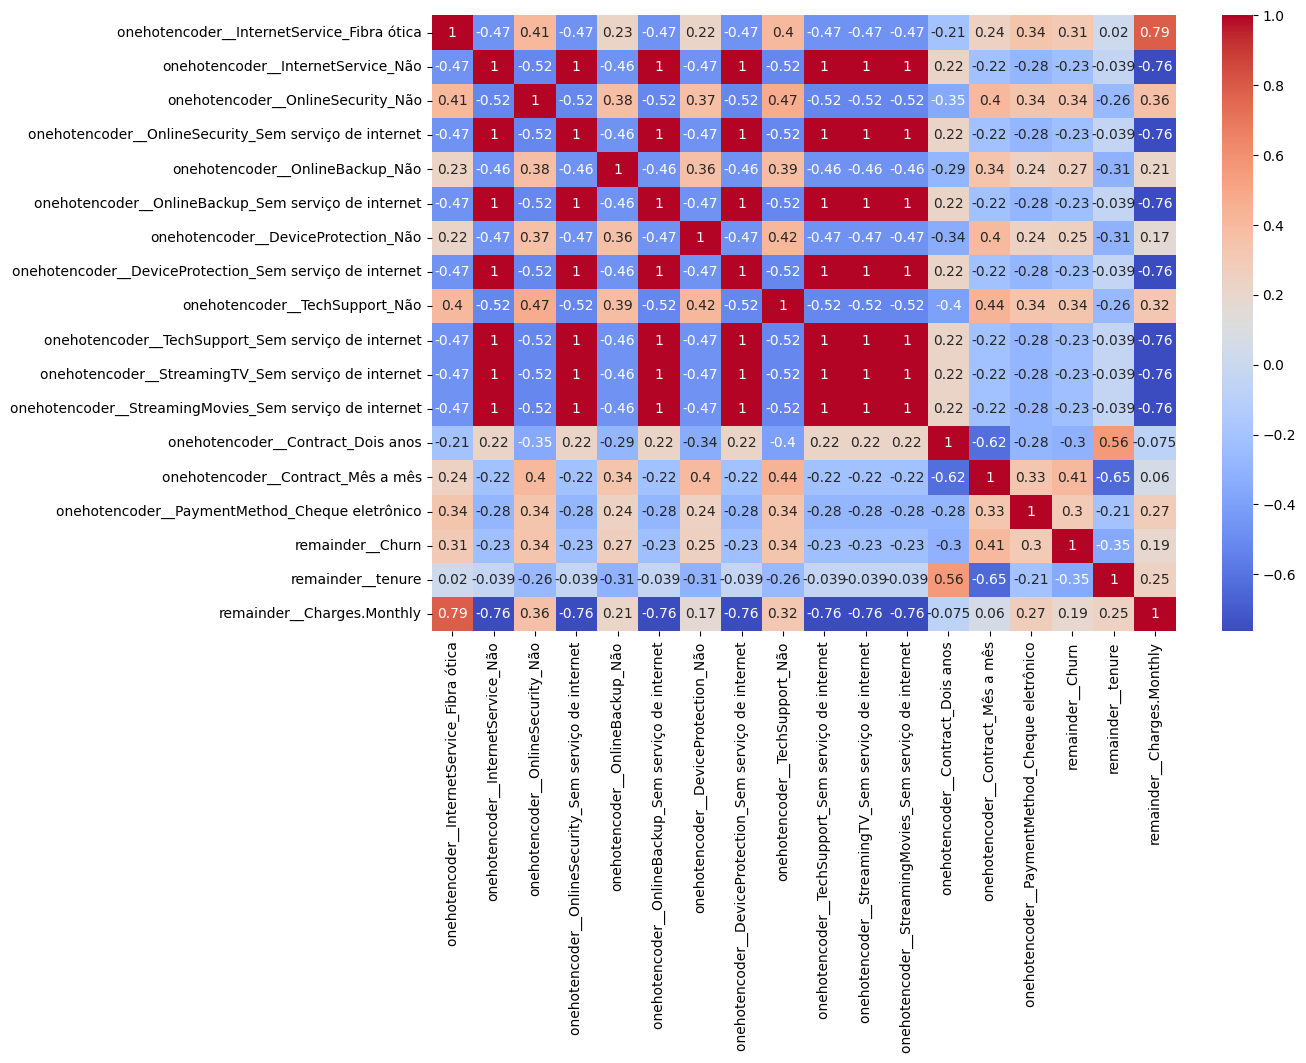

In [24]:


corr = dados_hot_filtrado.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [25]:
dados_hot_filtrado.dtypes

,0
onehotencoder__InternetService_Fibra ótica,float64
onehotencoder__InternetService_Não,float64
onehotencoder__OnlineSecurity_Não,float64
onehotencoder__OnlineSecurity_Sem serviço de internet,float64
onehotencoder__OnlineBackup_Não,float64
onehotencoder__OnlineBackup_Sem serviço de internet,float64
onehotencoder__DeviceProtection_Não,float64
onehotencoder__DeviceProtection_Sem serviço de internet,float64
onehotencoder__TechSupport_Não,float64
onehotencoder__TechSupport_Sem serviço de internet,float64


In [26]:
# criando data frame normalizado usando as colunas ja filtradas
from sklearn.preprocessing import MinMaxScaler
dados_hot_filtrado_norm = dados_hot_filtrado.copy()

scaler = MinMaxScaler()
colunas = ['remainder__tenure', 'remainder__Charges.Monthly']

dados_hot_filtrado_norm[colunas] = scaler.fit_transform(dados_hot_filtrado_norm[colunas])
dados_hot_filtrado_norm[colunas]

,remainder__tenure,remainder__Charges.Monthly
0,0.125000,0.471144
1,0.125000,0.414428
2,0.055556,0.553731
3,0.180556,0.793532
4,0.041667,0.653234
...,...,...
7038,0.180556,0.367164
7039,0.305556,0.665174
7040,0.027778,0.318905
7041,0.930556,0.493532


In [27]:
# funcao com as metricas de avalicao do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(y_true, y_pred):
    """
    Avalia um modelo de classificação usando métricas padrão.

    Parâmetros:
    - y_true: rótulos reais (array, lista ou Series)
    - y_pred: rótulos previstos pelo modelo

    Retorna:
    - Print das métricas e da matriz de confusão
    """

    print("🔍 Avaliação do Modelo:")
    print("-" * 30)
    print(f"Acurácia       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão       : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score       : {f1_score(y_true, y_pred):.4f}")
    print("-" * 30)
    print("📊 Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print("-" * 30)
    print("📄 Relatório de Classificação:")
    print(classification_report(y_true, y_pred))

In [28]:
from sklearn.model_selection import train_test_split
# separacao do treino e teste com o data frame nao normalizado
y = dados_hot_filtrado['remainder__Churn']
x = dados_hot_filtrado.drop('remainder__Churn', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)




In [29]:
#treinando o data frame nao normalizado
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train,y_train)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

🔍 Avaliação do Modelo:
------------------------------
Acurácia       : 0.7553
Precisão       : 0.5356
Recall         : 0.5270
F1-Score       : 0.5313
------------------------------
📊 Matriz de Confusão:
[[1303  254]
 [ 263  293]]
------------------------------
📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1557
           1       0.54      0.53      0.53       556

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [30]:
# separacao do treino e teste com o data frame normalizado
y = dados_hot_filtrado_norm['remainder__Churn']
x = dados_hot_filtrado_norm.drop('remainder__Churn', axis=1)

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x,y, test_size=0.3, random_state=2)

In [31]:
#treinando o data frame normalizado
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_norm,y_train_norm)
y_prev_norm = model.predict(x_test_norm)
avaliar_modelo(y_test_norm,y_prev_norm)

🔍 Avaliação do Modelo:
------------------------------
Acurácia       : 0.8045
Precisão       : 0.6531
Recall         : 0.5486
F1-Score       : 0.5963
------------------------------
📊 Matriz de Confusão:
[[1395  162]
 [ 251  305]]
------------------------------
📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1557
           1       0.65      0.55      0.60       556

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [32]:
#aplicar validacao cruzado no modelo que parece mais adequado (LogisticRegression)
from sklearn.model_selection import cross_validate, KFold
model = LogisticRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_norm, y_train_norm, cv=kf, scoring='recall')

In [33]:
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.4638122343692832, max:0.566333390032643


In [34]:
# estratificando os dados para ver da melhor maneiro o score do modelo
from sklearn.model_selection import StratifiedKFold
model = LogisticRegression()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_norm, y_train_norm, cv=skf, scoring='recall')
resulte

{'fit_time': array([0.02950001, 0.0239718 , 0.03584313, 0.05996251, 0.03598952]),
 'score_time': array([0.00951266, 0.00603032, 0.0072751 , 0.01069188, 0.00578141]),
 'test_score': array([0.45038168, 0.51145038, 0.5513308 , 0.53231939, 0.53612167])}

In [35]:
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.44563603060530993, max:0.5870055390693192


In [36]:
# usando oversample para tentar aprimorar o modelo
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_balanceado, y_train_balanceado = oversample.fit_resample(x_train_norm,y_train_norm)
y_train_balanceado.value_counts(normalize=True)

,proportion
remainder__Churn,
0,0.5
1,0.5


In [37]:
model = LogisticRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_balanceado, y_train_balanceado, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.7935152740513685, max:0.8333416141787553


In [38]:
from imblearn.pipeline import Pipeline as imbpipiline
model = LogisticRegression()
pipeline = imbpipiline([('oversample', SMOTE()), ('regression', model)])

In [39]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(pipeline ,x_train_norm, y_train_norm, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.7573769722021536, max:0.8461294912099772


In [40]:
model.fit(x_train_balanceado,y_train_balanceado)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

🔍 Avaliação do Modelo:
------------------------------
Acurácia       : 0.6484
Precisão       : 0.4158
Recall         : 0.8309
F1-Score       : 0.5543
------------------------------
📊 Matriz de Confusão:
[[908 649]
 [ 94 462]]
------------------------------
📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1557
           1       0.42      0.83      0.55       556

    accuracy                           0.65      2113
   macro avg       0.66      0.71      0.63      2113
weighted avg       0.78      0.65      0.67      2113



In [41]:
# usando under_sampling para ver se nao perco tanta precisao do modelo
from imblearn.under_sampling import NearMiss
model = LogisticRegression()
pipeline = imbpipiline([('undersample', NearMiss(version = 3)), ('regression', model)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(pipeline ,x_train_norm, y_train_norm, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.6080750681132171, max:0.717362472399126


In [42]:
undersample = NearMiss()
x_train_balanceado, y_train_balanceado = undersample.fit_resample(x_train_norm,y_train_norm)
model.fit(x_train_balanceado,y_train_balanceado)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

🔍 Avaliação do Modelo:
------------------------------
Acurácia       : 0.7482
Precisão       : 0.5188
Recall         : 0.5971
F1-Score       : 0.5552
------------------------------
📊 Matriz de Confusão:
[[1249  308]
 [ 224  332]]
------------------------------
📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1557
           1       0.52      0.60      0.56       556

    accuracy                           0.75      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.76      0.75      0.75      2113



In [45]:
model = LogisticRegression()
model.fit(x_train_norm,y_train_norm)
coef = model.coef_[0]
variaveis = x_train_norm.columns

# Cria dataframe de importância
importancia_logistica = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coef,
    'Importância_Absoluta': np.abs(coef)
}).sort_values(by='Importância_Absoluta', ascending=False)

print(importancia_logistica)

                                             Variável  Coeficiente  \
15                                  remainder__tenure    -2.008443   
16                         remainder__Charges.Monthly     0.856760   
12                  onehotencoder__Contract_Dois anos    -0.841776   
13                  onehotencoder__Contract_Mês a mês     0.765659   
0          onehotencoder__InternetService_Fibra ótica     0.676343   
14     onehotencoder__PaymentMethod_Cheque eletrônico     0.458523   
2                   onehotencoder__OnlineSecurity_Não     0.338550   
8                      onehotencoder__TechSupport_Não     0.338545   
4                     onehotencoder__OnlineBackup_Não     0.169142   
6                 onehotencoder__DeviceProtection_Não    -0.108747   
5   onehotencoder__OnlineBackup_Sem serviço de int...    -0.021812   
1                  onehotencoder__InternetService_Não    -0.021812   
3   onehotencoder__OnlineSecurity_Sem serviço de i...    -0.021812   
7   onehotencoder__D

# Relatório de Análise de Evasão de Clientes

## 1. Desempenho do Modelo

O modelo utilizado foi **Regressão Logística** com aplicação de **oversampling** para balanceamento da classe minoritária.  
Os resultados obtidos foram:

- **Acurácia:** 0.6484  
- **Precisão:** 0.4158  
- **Recall:** 0.8309  
- **F1-Score:** 0.5543  

### Matriz de Confusão
|                | Predito Não Evasão (0) | Predito Evasão (1) |
|----------------|------------------------|--------------------|
| **Real 0**     | 908                    | 649                |
| **Real 1**     | 94                     | 462                |

### Relatório de Classificação
| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| 0      | 0.91     | 0.58   | 0.71     | 1557    |
| 1      | 0.42     | 0.83   | 0.55     | 556     |
| **Média/Total** | **0.78** | **0.65** | **0.67** | 2113 |

---

## 2. Principais Fatores que Influenciam a Evasão

A importância das variáveis foi calculada com base nos coeficientes da regressão logística. Valores positivos indicam aumento na probabilidade de evasão, e valores negativos indicam diminuição.

| Variável                                                   | Coeficiente | Importância Absoluta |
|------------------------------------------------------------|-------------|----------------------|
| `remainder__tenure`                                        | -2.008443   | 2.008443             |
| `remainder__Charges.Monthly`                               | 0.856760    | 0.856760             |
| `onehotencoder__Contract_Dois anos`                        | -0.841776   | 0.841776             |
| `onehotencoder__Contract_Mês a mês`                        | 0.765659    | 0.765659             |
| `onehotencoder__InternetService_Fibra ótica`               | 0.676343    | 0.676343             |
| `onehotencoder__PaymentMethod_Cheque eletrônico`           | 0.458523    | 0.458523             |
| `onehotencoder__OnlineSecurity_Não`                        | 0.338550    | 0.338550             |
| `onehotencoder__TechSupport_Não`                           | 0.338545    | 0.338545             |
| `onehotencoder__OnlineBackup_Não`                          | 0.169142    | 0.169142             |
| `onehotencoder__DeviceProtection_Não`                      | -0.108747   | 0.108747             |
| Demais variáveis                                            | ≈ ±0.021812 | 0.021812             |

---

## 3. Interpretação dos Resultados

- **Tempo de contrato (`tenure`)** foi o fator mais relevante, com coeficiente negativo, indicando que clientes com mais tempo de permanência tendem a **evadir menos**.
- **Cobrança mensal alta (`Charges.Monthly`)** está associada a **maior probabilidade de evasão**.
- Contratos **mensais** aumentam o risco de saída, enquanto contratos de **dois anos** reduzem significativamente esse risco.
- Usuários com **internet de fibra óptica**, **pagamento por cheque eletrônico**, **sem segurança online** ou **sem suporte técnico** apresentam maior tendência à evasão.
- A ausência de **backup online** também está associada à maior evasão, embora com menor peso.

---

## 4. Estratégias de Retenção Sugeridas

Com base nos resultados:
1. **Fidelização por contratos longos:** oferecer benefícios e descontos para migração de contrato mensal para anual ou bienal.
2. **Ajuste de preços para clientes em risco:** reduzir mensalidade para usuários com alto custo mensal e baixa fidelidade.
3. **Aprimorar suporte e segurança online:** oferecer pacotes com suporte técnico e segurança digital gratuitos ou com desconto.
4. **Campanhas para novos clientes:** foco em retenção nos primeiros meses, período mais crítico para evasão.

---
